In [1]:
import matplotlib.pyplot as plt
import torch
from bin.model import BrainMimic
import networkx as nx
import nibabel as nib
import pandas as pd
import json
import os

220603-15:06:34,963 nipype.utils WARNING:
	 A newer version (1.8.1) of nipy/nipype is available. You are using 1.6.1


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
structure_graph_path = '../MTurk1/misc_testing_files/simplified_corr_graph.json' # path to shape color graph
data = json.load(open(structure_graph_path, 'r'))
gt = nx.readwrite.node_link_graph(data)

In [3]:
roi_atlas = nib.load('/Users/loggiasr/Projects/fmri/monkey_fmri/MTurk1/D99_v2.0_dist/simplified_atlas.nii')

In [4]:
start_node = None
for n, data in gt.nodes(data=True):
    if data['roi_name'] == 'V1':
        start_node = n
        break
echo = BrainMimic(gt, start_node, units_per_voxel=10, stimuli_shape=(1, 3, 64, 64), start_lr=.000001)

added computational node 0 mPFC with size (1, 6, 32, 32)
added computational node 1 oPFC with size (1, 12, 32, 32)
added computational node 2 vlPFC with size (1, 17, 32, 32)
added computational node 3 ant-IT with size (1, 13, 32, 32)
added computational node 4 STS with size (1, 30, 32, 32)
added computational node 5 hippocampus with size (1, 4, 32, 32)
added computational node 6 TE with size (1, 11, 32, 32)
added computational node 7 V3 with size (1, 11, 32, 32)
added computational node 8 V3a with size (1, 4, 32, 32)
added computational node 9 V4 with size (1, 25, 32, 32)
added computational node 10 MT with size (1, 9, 32, 32)
added computational node 11 V2 with size (1, 50, 32, 32)
added computational node 12 V1 with size (1, 14, 64, 64)
added computational node 13 putamen with size (1, 14, 32, 32)
added computational node 14 globbus-pallidus-internal with size (1, 2, 32, 32)
added computational node 15 globbus-pallidus-external with size (1, 4, 32, 32)
added computational node 16 cla

In [5]:
# load paradigm data
from PIL import Image
import numpy as np
path = '../MTurk1/stimuli/small_stimuli'
chromatic_colored_path = os.path.join(path, 'chromatic_colored')
chromatic_uncolored_path = os.path.join(path, 'chromatic_uncolored')
achromatic_path = os.path.join(path, 'achromatic')
colored_circle_path = os.path.join(path, 'colored_circle')

condition_paths = [chromatic_uncolored_path, chromatic_colored_path, achromatic_path, colored_circle_path]

stimuli = []

means = 0
stds = 0
count = 0
for path in condition_paths:
    cond_stim = []
    for f in sorted(os.listdir(path)):
        if '.png' in f:
            stim = torch.from_numpy(np.array(Image.open(os.path.join(path, f))).transpose((2, 0, 1))[None, :, :, :]).float()
            mean = torch.mean(stim)
            std = torch.std(stim)
            means += mean
            stds += std
            count += 1
            cond_stim.append(stim)
    stimuli.append(cond_stim)
means = means / count
stds = stds / count
for i, cond_stim in enumerate(stimuli):
    for j, stim in enumerate(cond_stim):
        stimuli[i][j] = (stim - means) / stds


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


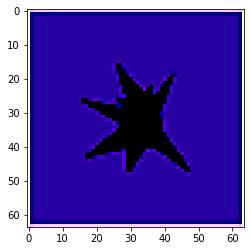

In [6]:
from matplotlib import pyplot as plt
plt.imshow(np.array(stimuli[1][8].reshape(3, 64, 64)).transpose((1,2,0)))

presenting cond  tensor(3) frame 0
computing inputs to node V4  on epoch 0
computing inputs to node putamen  on epoch 0
computing inputs to node MT  on epoch 0
computing inputs to node insula  on epoch 0
computing inputs to node ant-IT  on epoch 0
computing inputs to node globbus-pallidus-external  on epoch 0
computing inputs to node TE  on epoch 0
computing inputs to node claustrum  on epoch 0
computing inputs to node oPFC  on epoch 0
computing inputs to node hippocampus  on epoch 0
computing inputs to node V3  on epoch 0
computing inputs to node V3a  on epoch 0
computing inputs to node stimulus  on epoch 0
computing inputs to node V1  on epoch 0
computing inputs to node vlPFC  on epoch 0
computing inputs to node frontal-eye-field   on epoch 0
computing inputs to node mPFC  on epoch 0
computing inputs to node V2  on epoch 0
computing inputs to node STS  on epoch 0
computing inputs to node globbus-pallidus-internal  on epoch 0
presenting cond  tensor(3) frame 1
computing inputs to node

[14.84862995147705,
 14.596333503723145,
 13.360811233520508,
 13.734136581420898,
 13.592960357666016,
 13.134418487548828,
 13.19394302368164,
 13.271902084350586,
 13.460065841674805,
 13.110278129577637,
 13.249479293823242,
 13.924530029296875,
 13.255182266235352,
 13.240246772766113,
 12.898374557495117,
 13.232521057128906,
 13.322879791259766,
 13.171878814697266,
 13.157958984375,
 13.170435905456543,
 13.26551628112793,
 13.352590560913086,
 13.245965957641602,
 13.175102233886719,
 13.286519050598145,
 13.470327377319336,
 13.133752822875977,
 13.402003288269043,
 13.05673599243164,
 13.004172325134277,
 13.213560104370117,
 13.16475772857666,
 13.299406051635742,
 13.379961013793945,
 13.199414253234863,
 13.478822708129883,
 13.26130199432373,
 13.444177627563477,
 13.131250381469727,
 13.251690864562988,
 13.065382957458496,
 13.168394088745117,
 13.36874771118164,
 12.978639602661133,
 13.442245483398438,
 13.387189865112305,
 13.30688190460205,
 13.182820320129395,
 13

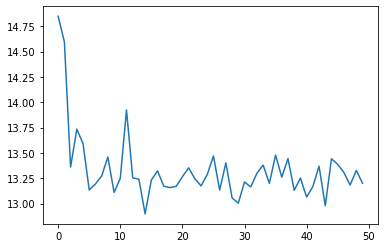

In [7]:
echo.fit_rdms(stimuli, epochs=50, stimulus_frames=20, verbose=True)

In [23]:
weights = []
ai_graph = echo.brain.copy()
for u, v, data in ai_graph.edges(data=True):
    weight = torch.sum(torch.abs(data['sequence'][0].weight.detach()).flatten()).item()
    weights.append(weight)
    ai_graph.add_edge(u, v, weight=weight)
threshold = np.std(np.array(weights))

In [24]:
for s, t, data in list(ai_graph.edges(data=True)):
    if np.abs(data['weight']) < threshold:
        ai_graph.remove_edge(s, t)

In [25]:
# rep graph
import graspologic as gr
pos_graph = ai_graph.copy()
for s, t, data in pos_graph.edges(data=True):
    pos_graph.edges[(s, t)]['weight'] = np.abs(data['weight'])
undirected_connectome, layout = gr.layouts.layout_tsne(pos_graph,
                                                       perplexity=10,
                                                       n_iter=1000)
for s, t, data in undirected_connectome.edges(data=True):
    undirected_connectome.edges[(s, t)]['weight'] = ai_graph.edges[(s, t)]['weight']

/Users/loggiasr/miniconda3/envs/fmri/lib/python3.8/site-packages/daal4py/sklearn/manifold/_t_sne.py:44: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn("The default initialization in TSNE will change "
/Users/loggiasr/miniconda3/envs/fmri/lib/python3.8/site-packages/daal4py/sklearn/manifold/_t_sne.py:60: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn("The default learning rate in TSNE will change "


In [26]:
from graspologic.layouts.classes import NodePosition
for i in range(len(layout)):
    new_data = gr.layouts.classes.NodePosition(node_id=int(layout[i].node_id),
                                               x=layout[i].x,
                                               y=layout[i].y,
                                               size=layout[i].size,
                                               community=layout[i].community)
    layout[i] = new_data
cmap = plt.get_cmap('viridis')

raw_edge_weights = np.array([edge[2]['weight'] for edge in undirected_connectome.edges(data=True)])
edge_weights = raw_edge_weights - min(raw_edge_weights)
edge_weights = edge_weights / max(edge_weights)

edge_colors = np.array([cmap(val) for val in edge_weights])

edge_widths = np.abs(raw_edge_weights) - np.min(raw_edge_weights)
edge_widths = edge_widths / max(edge_widths)
edge_widths = (1. * edge_widths) + .25

node_colors = ['#808080'] * len(undirected_connectome.nodes())
labels = {}
for n in undirected_connectome.nodes:
    if 'roi_name' in undirected_connectome.nodes[n]:
        labels[n] = undirected_connectome.nodes[n]['roi_name']
    else:
        labels[n] = 'unnamed'

In [27]:
# add edge colors
def rgb_to_hex(r, g, b):
  return ('{:X}{:X}{:X}').format(int(r*255), int(g*255), int(b*255))

for i, edge in enumerate(undirected_connectome.edges()):
    s, t = edge
    undirected_connectome.edges[(s, t)]['color'] = rgb_to_hex(edge_colors[i][0], edge_colors[i][1], edge_colors[i][2])
    undirected_connectome.edges[(s, t)]['width'] = edge_widths[i]
for i, n in enumerate(undirected_connectome.nodes()):
    undirected_connectome.nodes[n]['graphics'] = {'x': layout[i].x,
                                                  'y': layout[i].y,
                                                  'w': layout[i].size,
                                                  'h': layout[i].size}

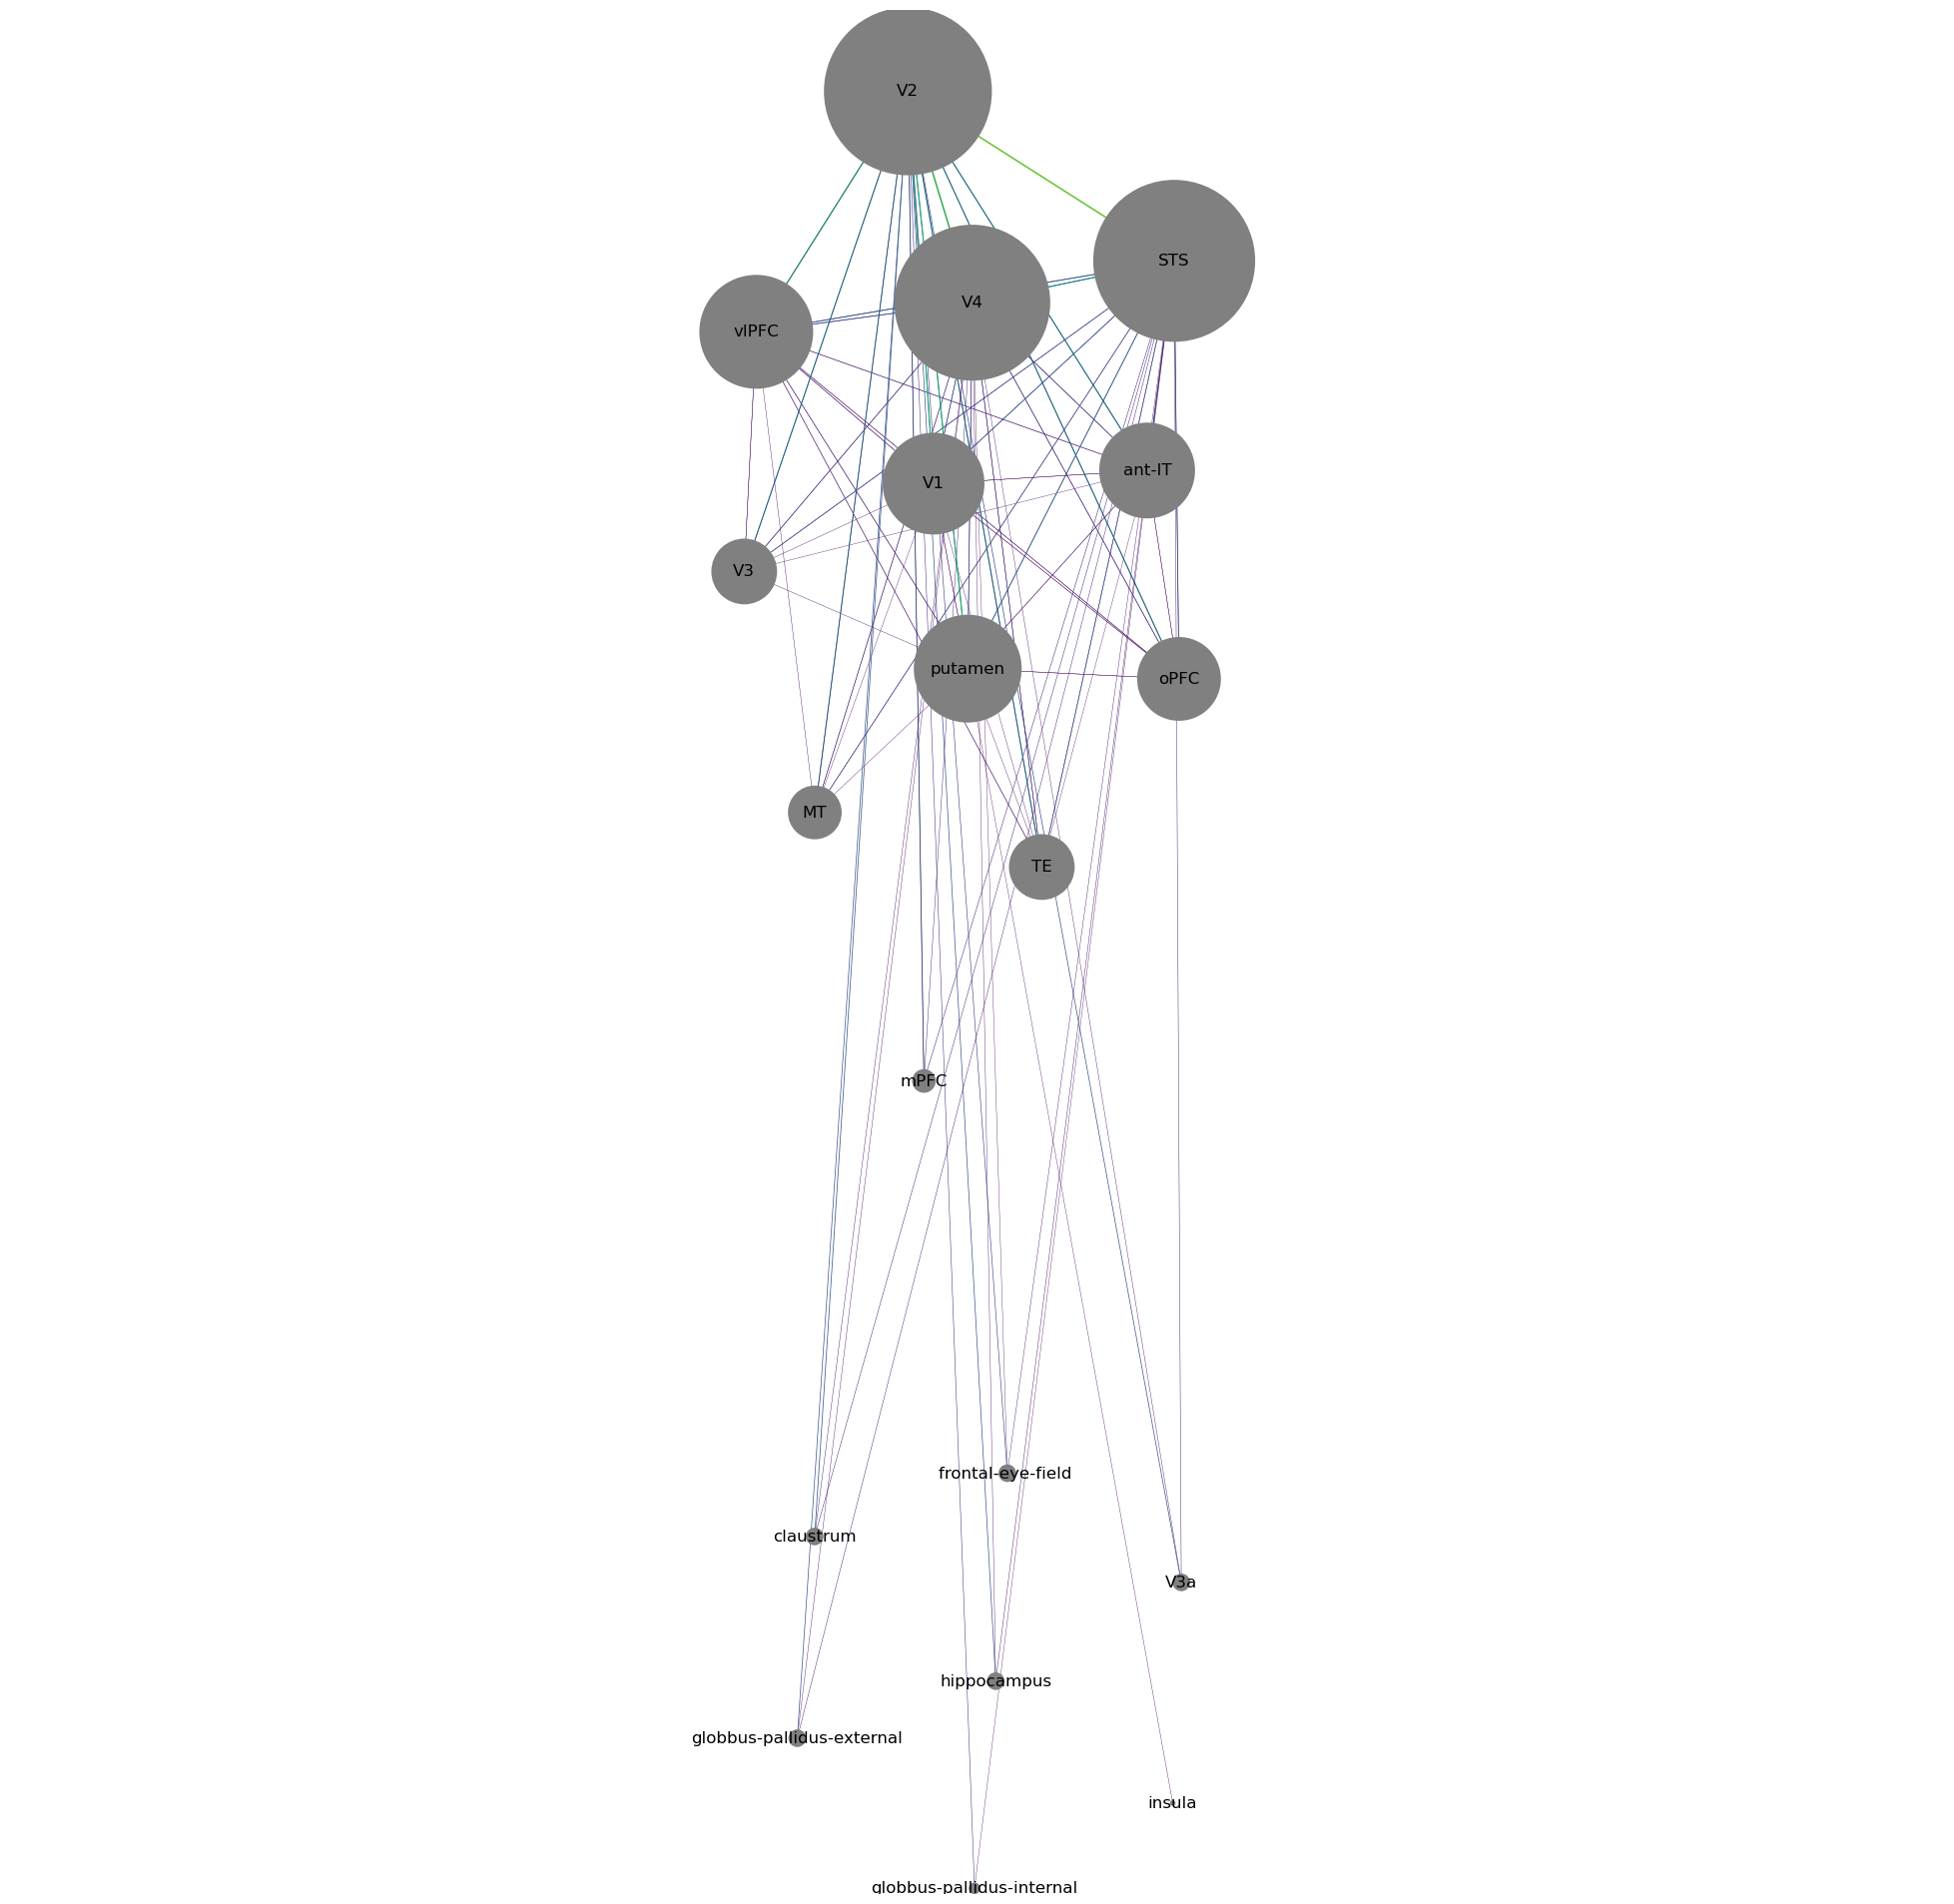

In [28]:
drawing = gr.layouts.render._draw_graph(undirected_connectome, layout, node_colors, 1.,
                                        edge_line_width=edge_widths,
                                        edge_alpha=1.,
                                        edge_colors=edge_colors,
                                        labels=labels,
                                        figure_width=25,
                                        figure_height=25)